### 나이브 베이즈 분류기를 이해하기 위한 단계별 학습

**확률**

- 사건 A가 발생할 가능성

- P(A) = 사건 A의 경우의 수 / 전체 경우의 수

<br>

**조건부 확률**

- 사건 B가 발생했을 때, 사건 A가 발생할 확률

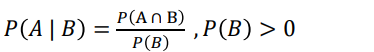

- 사건 A와 사건 B가 독립이라면,

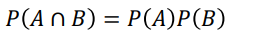

### 베이즈 정리(Bayes'Theorem)

- 공식

   - P(A|B) = {P(B|A)*P(A)}/ P(B)
   - P(A):사전확률(prior)
   - P(A|B) : 사후확률(posterior)

- 사전확률

   - 현재 정보를 바탕으로 정한 확률(동전 앞면 나올 확률 =1/2와 같이 정해진 것)

   - 내가 이미 사전에 알고 있는 확률

- 사후확률

   - 사건B가 사건 A로부터 발생했다는 가정하에 사건 A의 확률 업데이트
   - 베이즈 정리를 통해서 사후확률 계산

   - 내가 알고자 하는 것으로 아직 모르는 확률


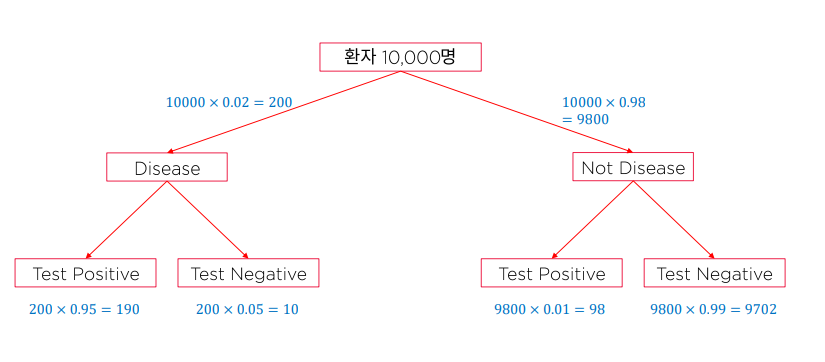

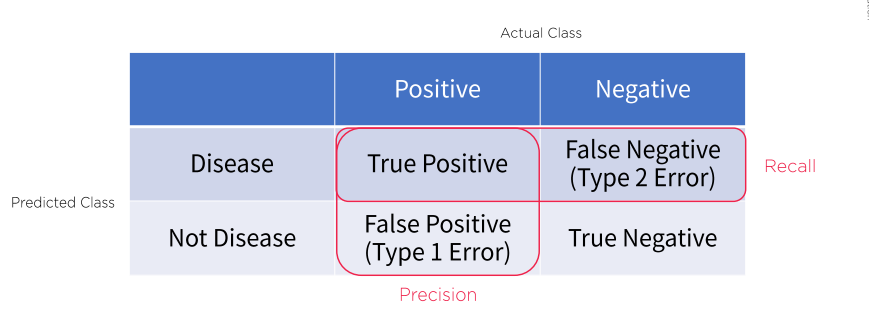

**실습: 조건부 확률, 베이즈 정리, likehood**

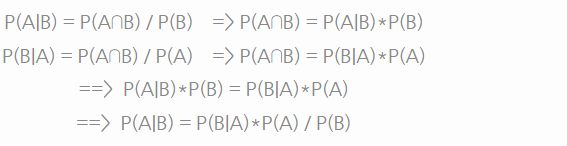

- 사전확률 :P(A)

- 사후 확률: P(A|B)

- likehood: P(B|A)로 사전에 경험상으로 대략 아는 확률

- 정규화 상수 : P(B)-사전에 알고 있는 수

In [1]:
import pandas as pd



In [2]:
#조건부 확률
#조건부 확률 데이터 생성(영화평에'재미있는' 단어 사용 여부)

df = pd.DataFrame({
    'Genre' : ['C','A','C','A','A','C','C','A'],
    'Fun' : ['Y','N','Y','Y','N','Y','N','Y']
})

In [3]:
df.groupby('Genre').size()

Genre
A    4
C    4
dtype: int64

In [4]:
df.groupby('Fun').size()

Fun
N    3
Y    5
dtype: int64

In [5]:
#Genre의 사전 확률
#Genre 중 'A', 또는 'C'가 나올 확률 P(A|Genre) or P(C|Gnere)
df.groupby('Genre').size().div(len(df))

Genre
A    0.5
C    0.5
dtype: float64

In [6]:
#Fun의 정규화 상수
df.groupby('Fun').size().div(len(df))

Fun
N    0.375
Y    0.625
dtype: float64

In [7]:
#Genre의 사전 확률
#Genre 중 'A', 또는 'C'가 나올 확률 P(A|Genre) or P(C|Gnere)
probGenre = df.groupby('Genre').size().div(len(df))
probGenre

Genre
A    0.5
C    0.5
dtype: float64

In [8]:
#Genre에 대한 Fun의 개수
df.groupby(['Genre', 'Fun']).size()

Genre  Fun
A      N      2
       Y      2
C      N      1
       Y      3
dtype: int64

In [9]:
#각 상황별 확률, 조건부
#확률 = P(Fun|Genre)

probFunByGenre = df.groupby(['Genre', 'Fun']).size().div(len(df))
probFunByGenre

Genre  Fun
A      N      0.250
       Y      0.250
C      N      0.125
       Y      0.375
dtype: float64

In [10]:
#likelihood = 장르별 '재미있는'단어 사용 가능도

likelihood = probFunByGenre.div(probGenre)
likelihood

Genre  Fun
A      N      0.50
       Y      0.50
C      N      0.25
       Y      0.75
dtype: float64

**정리**

P(Fun|Genre)를 구하기 위해서 probFunByGenre라는 변수를 구하였다. 이 변수의 의미는 Genre일때 Fun의 확률

장르별 재미있는 단어 사용 가능도를 구하기 위해서 likelihood = probFunByGenre.div(probGenre)


그 결과, 액션("A")는 재미있을 확률 없을 확률 둘 다 각각 50%
코미디('C')는 재미없을 확률 25%, 재미있을 확률 75%


### 나이즈베이즈 분류기

1. 베이즈 정리에 의한 통계기반 분류 알고리즘,지도학습

2. 특징

- 아이템의 특징끼리 서로 독립
- 영화 자을와 영화 감독이 서로 연관이 없는 특징이어야한다.
- 데이터 셋이 커도 모델 예측에 관계가 없다
- Discrete Variable에 잘 맞는다
- 간단하고, 계산량이 많지 않은 모델이다
- 데이터의 차원이 높아질수록 모든 class에 대해 확률이 0으로 수렴

   - Laplace Smoothing활용

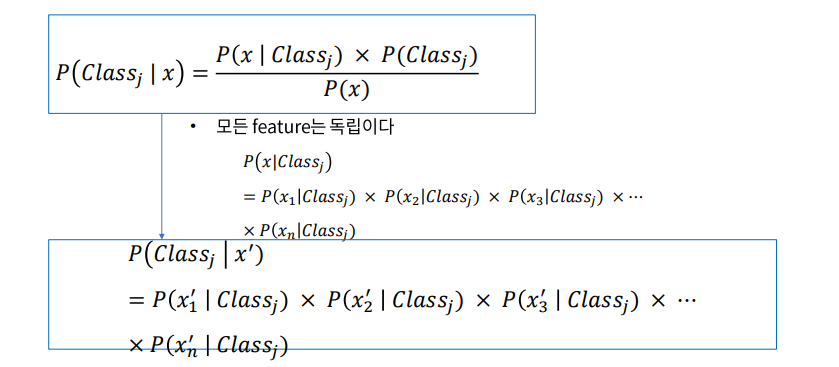

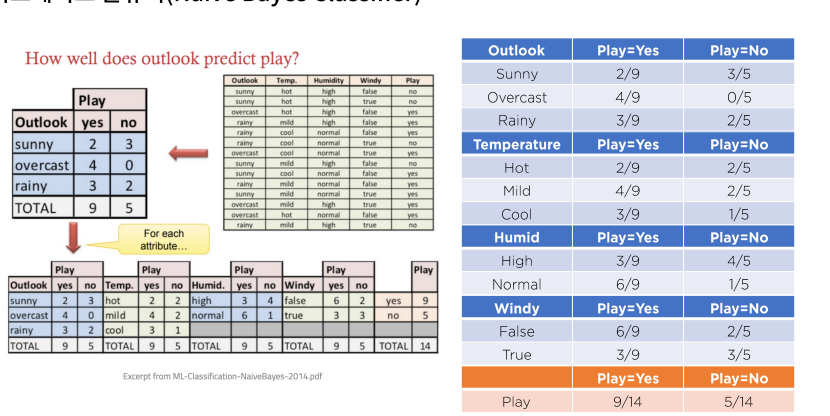

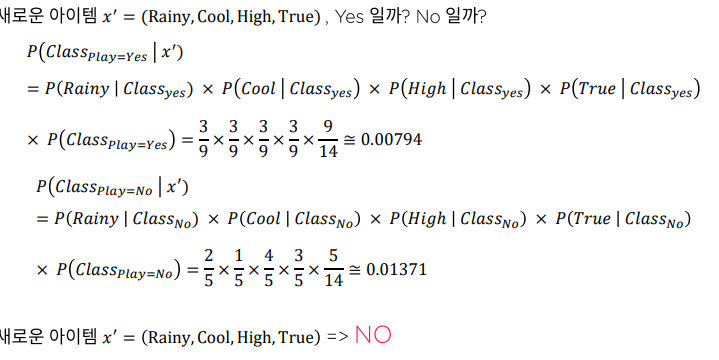

**사이킷런에서 제공하는 나이브베이즈 모형**

- GaussianNB: [정규분포 나이브베이즈](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)

- BernoulliiNB: [베르누이분포 나이브베이즈](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html)

- MultinomiaNB: [다항분포 나이브베이즈](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)